In [2]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 4.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import yfinance as yf

Historical simulation (non-parametric VaR)

In [4]:
aapl = yf.download('AAPL','2020-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [5]:
aapl = aapl.iloc[-501:]
aapl = aapl.pct_change().round(4)
aapl.dropna(inplace=True)

In [6]:
aapl

Date
2020-03-26    0.0526
2020-03-27   -0.0414
2020-03-30    0.0285
2020-03-31   -0.0020
2020-04-01   -0.0526
               ...  
2022-03-14   -0.0266
2022-03-15    0.0297
2022-03-16    0.0290
2022-03-17    0.0065
2022-03-18    0.0209
Name: Adj Close, Length: 500, dtype: float64

In [7]:
desc = aapl.describe()
desc.loc['var'] = aapl.var()
desc.loc['skew'] = aapl.skew()
desc.loc['kurt'] = aapl.kurtosis()
desc

count    500.000000
mean       0.002194
std        0.020001
min       -0.080100
25%       -0.008600
50%        0.001350
75%        0.014100
max        0.104700
var        0.000400
skew       0.243323
kurt       2.544359
Name: Adj Close, dtype: float64

In [8]:
aapl.std()*250

5.000274957119215

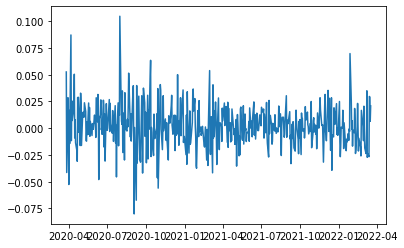

In [9]:
plt.plot(aapl);

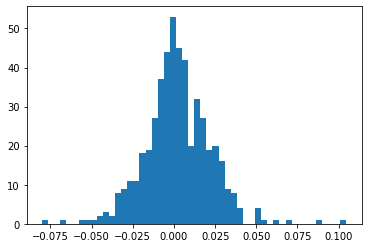

In [10]:
plt.hist(aapl,bins=50);

In [11]:
rtns = aapl.sort_values()
rtns

Date
2020-09-03   -0.0801
2020-09-08   -0.0673
2020-10-30   -0.0560
2020-04-01   -0.0526
2020-06-11   -0.0480
               ...  
2021-03-01    0.0539
2020-10-12    0.0635
2022-01-28    0.0698
2020-04-06    0.0872
2020-07-31    0.1047
Name: Adj Close, Length: 500, dtype: float64

In [12]:
# 99%신뢰수준에서의 1일 VaR(%)
VaR = rtns[4]
VaR

-0.048

In [13]:
# Expected Shortfall
ES = rtns[:5].mean()
ES

-0.0608

Historical simulation VaR for a portfolio of stocks

In [14]:
aapl = yf.download('AAPL','2020-01-01')['Adj Close']
nke = yf.download('NKE','2020-01-01')['Adj Close']
jnj = yf.download('JNJ','2020-01-01')['Adj Close']
dis = yf.download('DIS','2020-01-01')['Adj Close']
amd = yf.download('AMD','2020-01-01')['Adj Close']
xom = yf.download('XOM','2020-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
stocks = pd.DataFrame()
stocks['AAPL'] = aapl
stocks['NKE'] = nke
stocks['DIS'] = dis
stocks['AMD'] = amd
stocks['XOM'] = xom
stocks

,AAPL,NKE,DIS,AMD,XOM
Date,,,,,
2020-01-02,73.894325,100.250931,148.199997,49.099998,61.174889
2020-01-03,73.175934,99.976273,146.500000,48.599998,60.683086
2020-01-06,73.759010,99.887978,145.649994,48.389999,61.149010
2020-01-07,73.412117,99.838936,145.699997,48.250000,60.648560
2020-01-08,74.593040,99.613335,145.399994,47.830002,59.733967
...,...,...,...,...,...
2022-03-14,150.619995,117.570000,129.029999,102.250000,81.879997
2022-03-15,155.089996,119.400002,134.199997,109.330002,77.220001
2022-03-16,159.589996,125.190002,138.139999,115.370003,76.930000


In [16]:
stocks = stocks.iloc[-501:]
stocks = stocks.pct_change().round(4)
stocks.dropna(inplace=True)
stocks

,AAPL,NKE,DIS,AMD,XOM
Date,,,,,
2020-03-26,0.0526,0.0670,0.0460,0.0643,0.0410
2020-03-27,-0.0414,-0.0127,-0.0850,-0.0194,-0.0482
2020-03-30,0.0285,0.0258,0.0353,0.0275,0.0149
2020-03-31,-0.0020,-0.0309,-0.0321,-0.0497,0.0125
2020-04-01,-0.0526,-0.0424,-0.0174,-0.0400,-0.0116
...,...,...,...,...,...
2022-03-14,-0.0266,-0.0413,-0.0206,-0.0196,-0.0358
2022-03-15,0.0297,0.0156,0.0401,0.0692,-0.0569
2022-03-16,0.0290,0.0485,0.0294,0.0552,-0.0038


In [17]:
stock_returns = (stocks+1).cumprod()
stock_returns

,AAPL,NKE,DIS,AMD,XOM
Date,,,,,
2020-03-26,1.052600,1.067000,1.046000,1.064300,1.041000
2020-03-27,1.009022,1.053449,0.957090,1.043653,0.990824
2020-03-30,1.037779,1.080628,0.990875,1.072353,1.005587
2020-03-31,1.035704,1.047237,0.959068,1.019057,1.018157
2020-04-01,0.981226,1.002834,0.942380,0.978295,1.006346
...,...,...,...,...,...
2022-03-14,2.488596,1.512400,1.280944,2.290399,2.509289
2022-03-15,2.562507,1.535993,1.332310,2.448894,2.366511
2022-03-16,2.636820,1.610489,1.371480,2.584073,2.357518


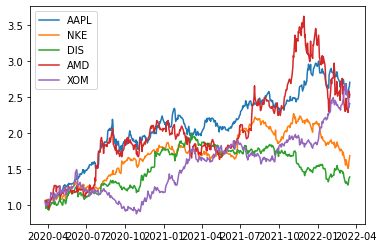

In [18]:
# 각 주식의 return
plt.plot(stock_returns)
plt.legend(stock_returns.columns);

In [19]:
desc = stocks.describe()
desc.loc['var'] = stocks.var()
desc.loc['skew'] = stocks.skew()
desc.loc['kurt'] = stocks.kurtosis()
desc

,AAPL,NKE,DIS,AMD,XOM
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.002194,0.001230,0.000879,0.002370,0.002047
std,0.020001,0.019223,0.020920,0.031926,0.024037
min,-0.080100,-0.076200,-0.085000,-0.100100,-0.088300
25%,-0.008600,-0.008875,-0.010050,-0.014950,-0.011925
50%,0.001350,0.000650,-0.000100,-0.000050,0.000450
75%,0.014100,0.011550,0.010500,0.020150,0.014300
max,0.104700,0.155300,0.135900,0.165000,0.126600
var,0.000400,0.000370,0.000438,0.001019,0.000578
skew,0.243323,1.095529,0.949840,0.511279,0.514885


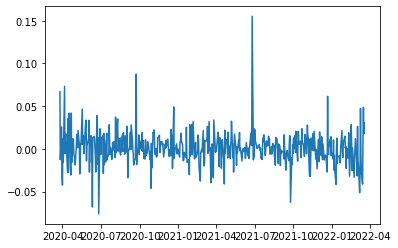

In [20]:
plt.plot(stocks['NKE']);

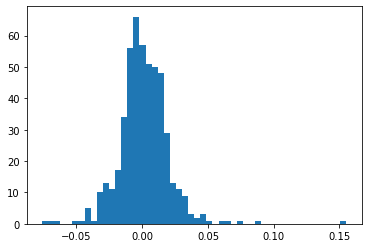

In [21]:
plt.hist(stocks['NKE'],bins=50);

문제 1: 애플, 나이키, 디즈니, AMD, 엑슨모빌로 이루어진 주식 포트폴리오의 비중이 각각 10%, 20%, 20%, 25%, 25%일때, Historical simulation을 이용하여 신뢰도 99%기준 1일 VaR과 ES를 구해보세요(dot product 이용)

In [22]:
weights = np.array([0.1, 0.2, 0.2, 0.25, 0.25])
portfolio = stocks @ weights

In [23]:
portfolio = portfolio.round(4)

In [24]:
rtns = portfolio.sort_values()
rtns

Date
2020-06-11   -0.0762
2020-03-27   -0.0406
2020-05-01   -0.0402
2020-09-03   -0.0397
2020-06-26   -0.0397
               ...  
2021-12-21    0.0417
2020-11-09    0.0454
2020-05-18    0.0477
2020-03-26    0.0542
2020-04-06    0.0725
Length: 500, dtype: float64

In [25]:
# 99%신뢰수준에서의 1일 VaR
VaR = rtns[4]
VaR

-0.0397

In [26]:
# Expected Shortfall
ES = rtns[:5].mean()
ES

-0.04728

Model-building approach (parametric VaR)

In [27]:
aapl = yf.download('AAPL','2020-01-01')['Adj Close']
aapl = aapl.iloc[-501:]
aapl = aapl.pct_change().round(4)
aapl.dropna(inplace=True)
aapl

[*********************100%***********************]  1 of 1 completed


Date
2020-03-26    0.0526
2020-03-27   -0.0414
2020-03-30    0.0285
2020-03-31   -0.0020
2020-04-01   -0.0526
               ...  
2022-03-14   -0.0266
2022-03-15    0.0297
2022-03-16    0.0290
2022-03-17    0.0065
2022-03-18    0.0209
Name: Adj Close, Length: 500, dtype: float64

In [28]:
alpha = 0.01
Z_value = round(stats.norm.ppf(abs(alpha)),4)
Z_value

-2.3263

In [29]:
mu = round(aapl.mean(),4)
sigma = round(aapl.std(),4)
print('mean return:',mu,'\nstandard deviation:',sigma)

mean return: 0.0022 
standard deviation: 0.02


In [30]:
#99% 신뢰수준에서 1일 VaR(%)
VaR = Z_value * sigma
VaR

-0.046526

In [31]:
ES = round(-sigma * ((np.exp(-Z_value ** 2 / 2) / (np.sqrt(2 * np.pi) * alpha))),4)
ES

-0.0533

Parametric VaR for a portfolio of stocks

In [32]:
aapl = yf.download('AAPL','2020-01-01')['Adj Close']
nke = yf.download('NKE','2020-01-01')['Adj Close']
jnj = yf.download('JNJ','2020-01-01')['Adj Close']
dis = yf.download('DIS','2020-01-01')['Adj Close']
amd = yf.download('AMD','2020-01-01')['Adj Close']
xom = yf.download('XOM','2020-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
stocks = pd.DataFrame()
stocks['AAPL'] = aapl
stocks['NKE'] = nke
stocks['DIS'] = dis
stocks['AMD'] = amd
stocks['XOM'] = xom
stocks

,AAPL,NKE,DIS,AMD,XOM
Date,,,,,
2020-01-02,73.894325,100.250916,148.199997,49.099998,61.174892
2020-01-03,73.175934,99.976280,146.500000,48.599998,60.683094
2020-01-06,73.759026,99.887985,145.649994,48.389999,61.149006
2020-01-07,73.412125,99.838943,145.699997,48.250000,60.648575
2020-01-08,74.593040,99.613327,145.399994,47.830002,59.733974
...,...,...,...,...,...
2022-03-14,150.619995,117.570000,129.029999,102.250000,81.879997
2022-03-15,155.089996,119.400002,134.199997,109.330002,77.220001
2022-03-16,159.589996,125.190002,138.139999,115.370003,76.930000


In [34]:
stocks = stocks.iloc[-501:]
stocks = stocks.pct_change().round(4)
stocks.dropna(inplace=True)
stocks

,AAPL,NKE,DIS,AMD,XOM
Date,,,,,
2020-03-26,0.0526,0.0670,0.0460,0.0643,0.0410
2020-03-27,-0.0414,-0.0127,-0.0850,-0.0194,-0.0482
2020-03-30,0.0285,0.0258,0.0353,0.0275,0.0149
2020-03-31,-0.0020,-0.0309,-0.0321,-0.0497,0.0125
2020-04-01,-0.0526,-0.0424,-0.0174,-0.0400,-0.0116
...,...,...,...,...,...
2022-03-14,-0.0266,-0.0413,-0.0206,-0.0196,-0.0358
2022-03-15,0.0297,0.0156,0.0401,0.0692,-0.0569
2022-03-16,0.0290,0.0485,0.0294,0.0552,-0.0038


In [35]:
desc = stocks.describe()
desc.loc['var'] = stocks.var()
desc.loc['skew'] = stocks.skew()
desc.loc['kurt'] = stocks.kurtosis()
desc

,AAPL,NKE,DIS,AMD,XOM
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.002194,0.001230,0.000879,0.002370,0.002047
std,0.020001,0.019223,0.020920,0.031926,0.024037
min,-0.080100,-0.076200,-0.085000,-0.100100,-0.088300
25%,-0.008600,-0.008875,-0.010050,-0.014950,-0.011925
50%,0.001350,0.000650,-0.000100,-0.000050,0.000450
75%,0.014100,0.011550,0.010500,0.020150,0.014300
max,0.104700,0.155300,0.135900,0.165000,0.126600
var,0.000400,0.000370,0.000438,0.001019,0.000578
skew,0.243323,1.095488,0.949840,0.511279,0.514885


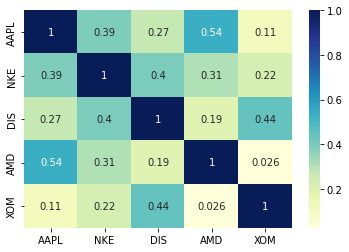

In [36]:
import seaborn as sns
sns.heatmap(stocks.corr(), annot=True, cmap="YlGnBu");

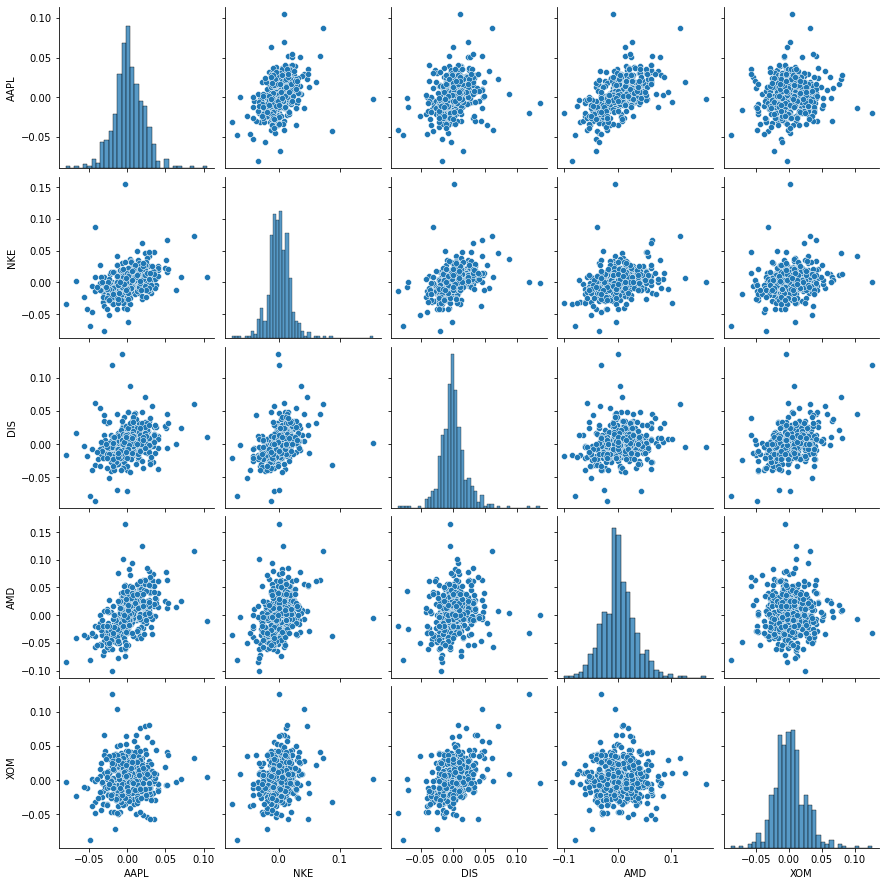

In [37]:
sns.pairplot(stocks);

In [38]:
#분산-공분산 행렬
covmat = stocks.cov()
covmat

,AAPL,NKE,DIS,AMD,XOM
AAPL,0.000400,0.000151,0.000113,0.000344,0.000054
NKE,0.000151,0.000370,0.000159,0.000190,0.000104
DIS,0.000113,0.000159,0.000438,0.000127,0.000223
AMD,0.000344,0.000190,0.000127,0.001019,0.000020
XOM,0.000054,0.000104,0.000223,0.000020,0.000578


문제 2: 애플, 나이키, 디즈니, AMD, 엑슨모빌로 이루어진 주식 포트폴리오의 비중이 각각 10%, 20%, 20%, 25%, 25%일때, 공분산행렬(covmat)을 이용하여 신뢰도 99%기준 1일 VaR과 ES, 신뢰도 95% 기준 10일 VaR과 ES를 구해보세요

In [39]:
weights = np.array([0.1, 0.2, 0.2, 0.25, 0.25])
portfolio = stocks @ weights
portfolio

Date
2020-03-26    0.054185
2020-03-27   -0.040580
2020-03-30    0.025670
2020-03-31   -0.022100
2020-04-01   -0.030120
                ...   
2022-03-14   -0.028890
2022-03-15    0.017185
2022-03-16    0.031330
2022-03-17    0.004785
2022-03-18    0.012285
Length: 500, dtype: float64

In [40]:
#historical std of portfolio
print('mean return of portfolio:',round(portfolio.mean(),4))
print('std of portfolio:',round(portfolio.std(),4))

mean return of portfolio: 0.0017
std of portfolio: 0.0157


In [41]:
#covariance matrix로 살펴본 portfolio의 표준편차
portfolio_var = weights.T @ covmat @ weights
portfolio_std = np.sqrt(portfolio_var).round(4)
portfolio_std

0.0157

In [42]:
alpha = 0.01
Z_value = round(stats.norm.ppf(abs(alpha)),4)
Z_value

-2.3263

In [43]:
#99% 신뢰수준에서 1일 VaR(%)
VaR = Z_value * portfolio_std
VaR

-0.03652290999999999

In [44]:
ES = round(-portfolio_std * ((np.exp(-Z_value ** 2 / 2) / (np.sqrt(2 * np.pi) * alpha))),4)
ES

-0.0418

VaR estimation by MC

In [95]:
corr = stocks.corr()
corr

,AAPL,NKE,DIS,AMD,XOM
AAPL,1.000000,0.392521,0.269855,0.538201,0.111997
NKE,0.392521,1.000000,0.395619,0.309199,0.224659
DIS,0.269855,0.395619,1.000000,0.190890,0.443892
AMD,0.538201,0.309199,0.190890,1.000000,0.025824
XOM,0.111997,0.224659,0.443892,0.025824,1.000000


In [96]:
#상관관계가 있는 난수 만들기(Cholesky Decomposition)
L = np.linalg.cholesky(corr)# lower triangle
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.39252061,  0.91974321,  0.        ,  0.        ,  0.        ],
       [ 0.26985498,  0.3149745 ,  0.90992821,  0.        ,  0.        ],
       [ 0.53820093,  0.10649091,  0.01331131,  0.83595589,  0.        ],
       [ 0.1119972 ,  0.19646554,  0.38661051, -0.072397  ,  0.89115033]])

In [97]:
A = np.random.standard_normal((5,5000))
B = L @ A

In [98]:
B = pd.DataFrame(B.T)
B.columns = stocks.columns

In [104]:
B.corr()

,AAPL,NKE,DIS,AMD,XOM
AAPL,1.000000,0.387920,0.257214,0.517001,0.074267
NKE,0.387920,1.000000,0.387995,0.281702,0.202096
DIS,0.257214,0.387995,1.000000,0.158020,0.420428
AMD,0.517001,0.281702,0.158020,1.000000,0.015231
XOM,0.074267,0.202096,0.420428,0.015231,1.000000


In [99]:
B.mean()

AAPL    0.024242
NKE     0.012509
DIS     0.016757
AMD     0.026536
XOM    -0.008936
dtype: float64

In [100]:
B = B - B.mean()

In [102]:
B.mean().round(4)

AAPL    0.0
NKE    -0.0
DIS    -0.0
AMD     0.0
XOM     0.0
dtype: float64

In [103]:
B.std()

AAPL    1.001228
NKE     0.998236
DIS     0.996992
AMD     0.998155
XOM     1.004370
dtype: float64

In [119]:
B

,AAPL,NKE,DIS,AMD,XOM
0,-0.273909,-1.525618,-0.351905,0.747887,-0.694503
1,-0.552973,-2.001119,0.401943,0.070822,0.412936
2,-0.279513,-1.197936,0.120460,0.037157,0.069608
3,0.624771,0.282873,-0.581734,1.306096,-0.441025
4,-0.071520,-1.464379,-0.224130,1.146392,-1.619431
...,...,...,...,...,...
4995,1.613416,1.147598,0.103017,0.290976,-0.679065
4996,0.693931,1.139600,1.429526,0.331099,1.300399
4997,0.107917,-1.563890,-1.553375,0.414464,1.119130
4998,1.957238,-0.279612,0.038793,-0.649598,0.611397


In [120]:
sigmas = np.array(stocks.std())
sigmas

array([0.0200011 , 0.01922294, 0.02091968, 0.03192618, 0.02403672])

In [123]:
returns = B * sigmas
returns

,AAPL,NKE,DIS,AMD,XOM
0,-0.005478,-0.029327,-0.007362,0.023877,-0.016694
1,-0.011060,-0.038467,0.008409,0.002261,0.009926
2,-0.005591,-0.023028,0.002520,0.001186,0.001673
3,0.012496,0.005438,-0.012170,0.041699,-0.010601
4,-0.001430,-0.028150,-0.004689,0.036600,-0.038926
...,...,...,...,...,...
4995,0.032270,0.022060,0.002155,0.009290,-0.016323
4996,0.013879,0.021906,0.029905,0.010571,0.031257
4997,0.002158,-0.030063,-0.032496,0.013232,0.026900
4998,0.039147,-0.005375,0.000812,-0.020739,0.014696


In [125]:
portfolio = returns @ weights
portfolio

0      -0.006090
1      -0.004071
2      -0.003946
3       0.007678
4      -0.007292
          ...   
4995    0.006312
4996    0.022207
4997   -0.002263
4998    0.001491
4999   -0.005630
Length: 5000, dtype: float64

In [138]:
portfolio.sort_values()

1390   -0.055925
2486   -0.053540
2227   -0.052332
1019   -0.051805
1184   -0.049481
          ...   
3752    0.047680
3273    0.048441
1281    0.048562
935     0.052299
1762    0.057674
Length: 5000, dtype: float64

In [139]:
VaR = portfolio.sort_values().iloc[49]
VaR

-0.036470369302110894

In [141]:
ES = portfolio.sort_values().iloc[:49].mean()
ES

-0.04214553587178926